In [58]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, normalize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [55]:
def load_data():
    X_train = pd.read_pickle('../data/X_train_pca.npk')
    X_test = pd.read_pickle('../data/X_test_pca.npk')

    y_train = pd.read_pickle('../data/y_train.pkl')
    y_test = pd.read_pickle('../data/y_test.pkl')
    
    return X_train, y_train, X_test, y_test

In [3]:
def errors(y_pred, y_test):
    print('R^2 score:', r2_score(y_pred, y_test))
    print('Mean absolute error:', mean_absolute_error(y_pred, y_test))
    print('Mean squared error:', mean_squared_error(y_pred, y_test))

In [6]:
# normalize the X_train and X_test data
def run_scaled(X_train, y_train, X_test, y_test, log=False):
    xtrain_scaled = normalize(X_train)
    xtest_scaled = normalize(X_test)
        
    if log:
        # convert transactionRevenue to log(transactionRevenue)
        y_train = y_train['totals.transactionRevenue'].replace(0, 1).apply(np.log)
        y_test = y_test['totals.transactionRevenue'].replace(0, 1).apply(np.log)
    else:
        y_train = y_train['totals.transactionRevenue']
        y_test = y_test['totals.transactionRevenue']

    k_neighbors_regressor = KNeighborsRegressor(n_neighbors=10, weights='uniform', algorithm='auto', p=2, n_jobs=-1)
    k_neighbors_regressor.fit(xtrain_scaled, y_train)
    y_pred = k_neighbors_regressor.predict(xtest_scaled)
    
    errors(y_pred, y_test)

In [5]:
def run(X_train, y_train, X_test, y_test, log=False):
    if log:
        # convert transactionRevenue to log(transactionRevenue)
        y_train = y_train['totals.transactionRevenue'].replace(0, 1).apply(np.log)
        y_test = y_test['totals.transactionRevenue'].replace(0, 1).apply(np.log)
    else:
        y_train = y_train['totals.transactionRevenue']
        y_test = y_test['totals.transactionRevenue']

    k_neighbors_regressor = KNeighborsRegressor(n_neighbors=10, weights='uniform', algorithm='auto', p=2, n_jobs=-1)
    k_neighbors_regressor.fit(X_train, y_train)
    y_pred = k_neighbors_regressor.predict(X_test)
    
    errors(y_pred, y_test)

In [14]:
X_train, y_train, X_test, y_test = load_data()

start = time.time()
print("Scaled the predictors")
run_scaled(X_train, y_train, X_test, y_test)
print('time taken:', str(time.time() - start))

print()
start = time.time()
print("Scaled the predictors but took log of response")
run_scaled(X_train, y_train, X_test, y_test, log=True)
print('time taken:', str(time.time() - start))

print()
start = time.time()
print("Didn't scale the predictors")
run(X_train, y_train, X_test, y_test)
print('time taken:', str(time.time() - start))

print()
start = time.time()
print("Didn't scale the predictors but took log of response")
run(X_train, y_train, X_test, y_test, log=True)
print('time taken:', str(time.time() - start))

Scaled the predictors
R^2 score: -3.8385387801624935
Mean absolute error: 2152779.0629947525
Mean squared error: 2151677492722448.2
time taken: 131.7610239982605

Scaled the predictors but took log of response
R^2 score: -1.2097618659080394
Mean absolute error: 0.26457123414121275
Mean squared error: 2.574164946920913
time taken: 126.13101291656494

Didn't scale the predictors
R^2 score: -7.0332189997249674
Mean absolute error: 2026958.773039919
Mean squared error: 1983370617729742.5
time taken: 156.87695789337158

Didn't scale the predictors but took log of response
R^2 score: -1.219342865399653
Mean absolute error: 0.2617276099462316
Mean squared error: 2.558863692018065
time taken: 158.51106572151184


# Run KNeighbourRegressor for different configurations

In [56]:
def get_errors(y_pred, y_test):
    return (r2_score(y_pred, y_test), mean_absolute_error(y_pred, y_test), mean_squared_error(y_pred, y_test))

In [3]:
def kneighbors_regressor(X_train, y_train, X_test, y_test, n_neighbors):    
    y_train = y_train['totals.transactionRevenue'].replace(0, 1).apply(np.log)
    y_test = y_test['totals.transactionRevenue'].replace(0, 1).apply(np.log)
    
    errors = list()
    
    for neighbors in n_neighbors:
        k_neighbors_regressor = KNeighborsRegressor(n_neighbors=neighbors, weights='uniform', algorithm='auto', p=2, n_jobs=-1)
        k_neighbors_regressor.fit(X_train, y_train)
        y_pred = k_neighbors_regressor.predict(X_test)
    
        errors.append(get_errors(y_pred, y_test))
    
    return errors

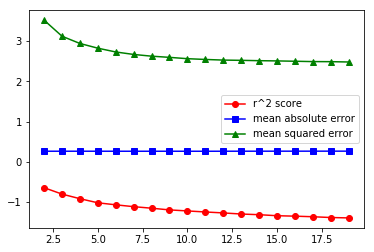

In [10]:
X_train, y_train, X_test, y_test = load_data()

n_neighbors = range(2, 20)

errors = kneighbors_regressor(X_train, y_train, X_test, y_test, n_neighbors)

# plot r^2 score
r2_error, = plt.plot(n_neighbors, [x[0] for x in errors], color='r', marker='o', linestyle='-', label='r^2 score')

# plot mean absolute error
mean_abs_error, = plt.plot(n_neighbors, [x[1] for x in errors], color='b', marker='s', linestyle='-', label='mean absolute error')

# plot mean squared error
mean_squ_error, = plt.plot(n_neighbors, [x[2] for x in errors], color='g', marker='^', linestyle='-', label='mean squared error')

plt.legend(handles=[r2_error, mean_abs_error, mean_squ_error])

# Without log of response

In [53]:
def kneighbors_regressor(X_train, y_train, X_test, y_test, n_neighbors):    
    y_train = y_train['totals.transactionRevenue']
    y_test = y_test['totals.transactionRevenue']
    
    errors = list()
    
    for neighbors in n_neighbors:
        k_neighbors_regressor = KNeighborsRegressor(n_neighbors=neighbors, weights='uniform', algorithm='auto', p=2, n_jobs=-1)
        k_neighbors_regressor.fit(X_train, y_train)
        y_pred = k_neighbors_regressor.predict(X_test)
    
        errors.append(get_errors(y_pred, y_test))
    
    return errors

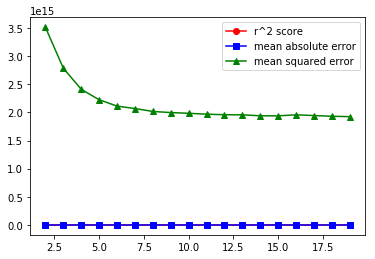

In [59]:
X_train, y_train, X_test, y_test = load_data()

n_neighbors = range(2, 20)

errors = kneighbors_regressor(X_train, y_train, X_test, y_test, n_neighbors)

# plot mean absolute error
mean_abs_error, = plt.plot(n_neighbors, [x[1] for x in errors], color='b', marker='s', linestyle='-', label='mean absolute error')

# plot mean squared error
mean_squ_error, = plt.plot(n_neighbors, [x[2] for x in errors], color='g', marker='^', linestyle='-', label='mean squared error')

plt.legend(handles=[mean_abs_error, mean_squ_error])

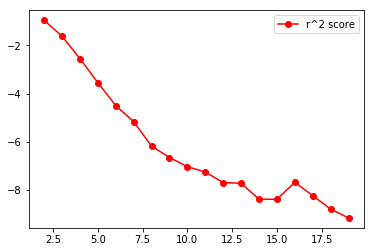

In [61]:
# plot r^2 score

r2_error, = plt.plot(n_neighbors, [x[0] for x in errors], color='r', marker='o', linestyle='-', label='r^2 score')
plt.legend(handles=[r2_error])

# Plot for RMSE without log of response

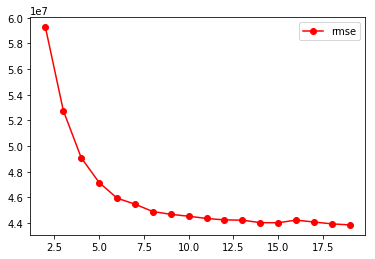

In [73]:
import math

my_sqrt = np.vectorize(math.sqrt)

rmse = my_sqrt(np.array([x[2] for x in errors]))

# plot rmse
rmse_plt, = plt.plot(n_neighbors, rmse, color='r', marker='o', linestyle='-', label='rmse')
plt.legend(handles=[rmse_plt])